In [0]:
import cv2
import numpy as np
import imutils
from skimage.filters import threshold_local

In [0]:
def order_points(pts):
  rect = np.zeros((4,2), dtype='float32')
  s = pts.sum(axis=1)
  rect[0] = pts[np.argmin(s)]
  rect[2] = pts[np.argmax(s)]

  diff = np.diff(pts, axis =1)
  rect[1] = pts[np.argmin(diff)]
  rect[3] = pts[np.argmax(diff)]

  return(rect)
  

In [0]:
def four_point_transform(image, pts):
  pts = order_points(pts)
  (tl, tr, bl, br) = pts
  width1 = np.sqrt(((br[0]-bl[0])**2)+((br[1]-bl[1])**2))
  width2 = np.sqrt(((tr[0]-tl[0])**2)+((tr[1]-tl[1])**2))
  max_width = max(int(width1), int(width2))

  height1 = np.sqrt(((tl[0]-bl[0])**2)+((tl[1]-bl[1])**2))
  height2 = np.sqrt(((tr[0]-br[0])**2)+((tr[1]-br[1])**2))
  max_height = max(int(height1), int(height2))

  dest = np.array([[0,0], [max_width-1, 0], [max_width-1, max_height-1], [0, max_height-1]], dtype = 'float32')

  Matrix = cv2.getPerspectiveTransform(pts, dest)
  warped = cv2.warpPerspective(image, Matrix, (max_width, max_height))

  return warped



In [0]:
import os
path = "/content/drive/My Drive/document-scanner/images"
os.chdir(path)
os.listdir('.')

['receipt.jpg',
 'page.jpg',
 'example_01.png',
 'example_02.png',
 'example_03.png']

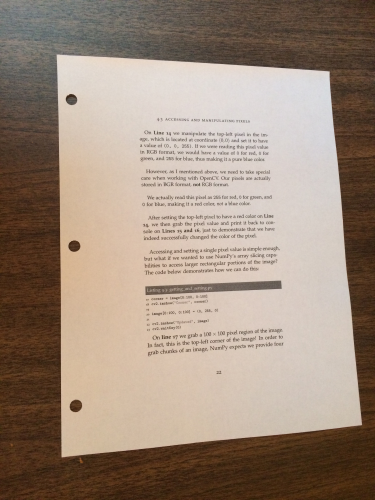

-1

In [0]:
from google.colab.patches import cv2_imshow
image = cv2.imread('page.jpg')
image = imutils.resize(image, height=500)
#image = imutils.rotate_bound(image, -90)
cv2_imshow(image)
cv2.waitKey(0)



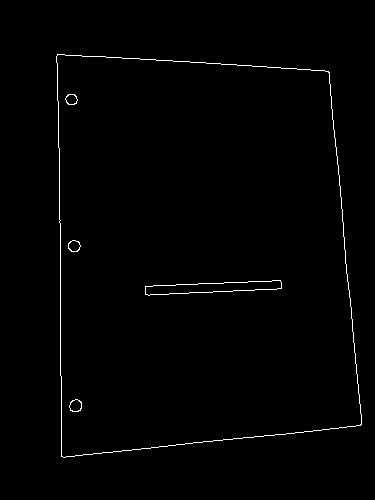

In [0]:
ratio = image.shape[0]/500.0
#resized = imutils.resize(image, height=500)
orig = image.copy()

gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
blurred  = cv2.GaussianBlur(gray, (5,5), 0)
edged = cv2.Canny(blurred, 75, 255)
#egy_expt = cv2.Canny(resized, 75, 255)

cv2_imshow(edged)
cv2.waitKey(0)
print('\n')
#cv2_imshow(egy_expt)
#cv2.waitKey(0)

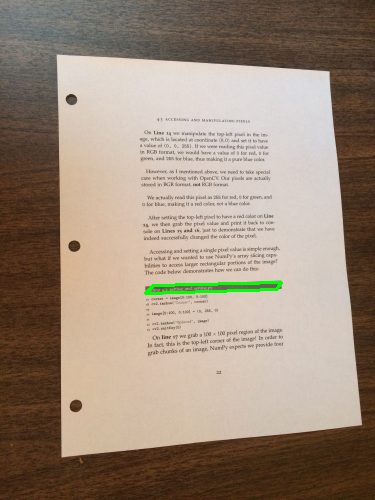

-1

In [0]:
cnt = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE )
cnt = imutils.grab_contours(cnt)
cnt = sorted(cnt, key = cv2.contourArea, reverse=True)[:5]

for c in cnt:
  peri = cv2.arcLength(c, True)
  approx_points = cv2.approxPolyDP(c, peri*0.02, True)
  if len(approx_points)==4:
    screencnt = approx_points
cv2.drawContours(orig, [screencnt], -1, (0,255, 0), 2)
cv2_imshow(orig)
cv2.waitKey(0)

In [0]:
print(screencnt)

[[[464 111]]

 [[473 323]]

 [[147 374]]

 [[115 136]]]


In [0]:
warped = four_point_transform(orig, screencnt.reshape(4,2))
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
#T = threshold_local(warped, 21, offset =10, method='gaussian')
warped = cv2.adaptiveThreshold(warped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 251, 11)
warped = (warped>T).astype('uint8')*255

#cv2_imshow(image)
cv2_imshow(warped)
cv2.waitKey(0)

ValueError: ignored

In [0]:
warped = four_point_transform(image, pts)
cv2_imshow()
cv2.waitKey(0)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
